# Intelligent Predictive Maintenance System for Metro Train Air Production Unit  Using Machin Learning Model

## Step1: Importing Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import os
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

## Step2: Importing the dataset

In [2]:
df = pd.read_csv('Metro.csv')

## Step3: Data Cleaning

In [3]:
# reading the first five rows using head()

In [4]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
df.tail()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516947,15169470,2020-09-01 03:59:50,-0.014,8.860,8.848,-0.022,8.864,59.475,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
# checking the shape of dataset

In [7]:
df.shape

(1516948, 17)

In [8]:
# reading the number of columns

In [9]:
df.columns


Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [10]:
# know the nummber of rows, columns and info about the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
Unnamed: 0         1516948 non-null int64
timestamp          1516948 non-null object
TP2                1516948 non-null float64
TP3                1516948 non-null float64
H1                 1516948 non-null float64
DV_pressure        1516948 non-null float64
Reservoirs         1516948 non-null float64
Oil_temperature    1516948 non-null float64
Motor_current      1516948 non-null float64
COMP               1516948 non-null float64
DV_eletric         1516948 non-null float64
Towers             1516948 non-null float64
MPG                1516948 non-null float64
LPS                1516948 non-null float64
Pressure_switch    1516948 non-null float64
Oil_level          1516948 non-null float64
Caudal_impulses    1516948 non-null float64
dtypes: float64(15), int64(1), object(1)
memory usage: 196.7+ MB


In [12]:
# Describe the dataset

In [13]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
# Check for null values

In [15]:
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

# Exploratary Data Analysis

## Count Plot

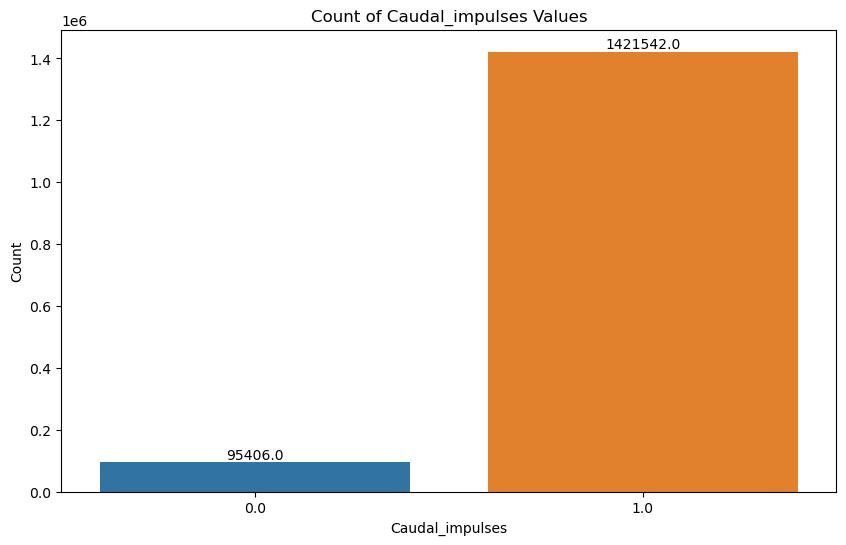

In [16]:
# Create a count plot for the 'Caudal_impulses' column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Caudal_impulses')
plt.xlabel('Caudal_impulses')
plt.ylabel('Count')
plt.title('Count of Caudal_impulses Values')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [17]:
df['Caudal_impulses'].unique()

array([1., 0.])

In [18]:
# applying label encoder to timestamp due to it's Object datatype

In [19]:
le = LabelEncoder()
df['timestamp'] = le.fit_transform(df['timestamp'])

In [20]:
#Defining Dependent and independent variables

In [21]:
# Assuming 'Caudal_impulses' is the target variable
target_column = 'Caudal_impulses'

# Define X and Y
X = df.drop(columns=[target_column,'Unnamed: 0','timestamp'])
y = df[target_column]

In [22]:
X

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level
0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1516944,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1516945,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1516946,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [23]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Caudal_impulses, dtype: float64

In [24]:
# Data Splitting

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=77 )

In [26]:
labels=['Fault ', 'No Fault']

In [27]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [28]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# MLPClassifier

Model loaded successfully.
model/MLPClassifier Accuracy    : 54.42829361547843
model/MLPClassifier Precision   : 56.088856181735004
model/MLPClassifier Recall      : 51.44283337558593
model/MLPClassifier FSCORE      : 41.41469129497149

 model/MLPClassifier classification report
               precision    recall  f1-score   support

      Fault        0.08      0.58      0.14      9545
    No Fault       0.95      0.54      0.69    142150

    accuracy                           0.54    151695
   macro avg       0.51      0.56      0.41    151695
weighted avg       0.90      0.54      0.66    151695



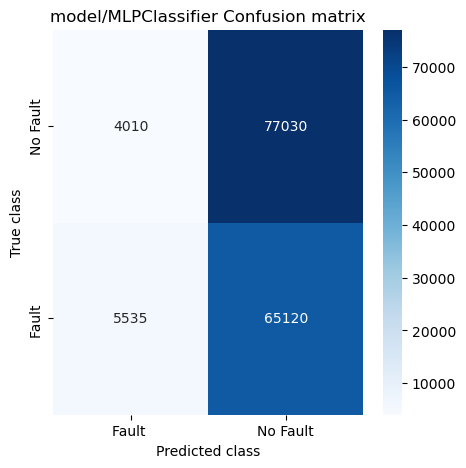

In [29]:
if os.path.exists('model/MLPClassifier.pkl'):
    # Load the trained model from the file
    mlp = joblib.load('model/MLPClassifier.pkl')
    print("Model loaded successfully.")
    predict = mlp.predict(X_test)
    calculateMetrics("model/MLPClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    mlp = MLPClassifier() 
    mlp.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(mlp,'model/MLPClassifier.pkl')
    print("Model saved successfully.")
    predict = mlp.predict(X_test)
    calculateMetrics("MLPClassifier", predict, y_test)

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=77 )

In [31]:
# applying smote 

In [32]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [33]:
X_train ,y_train = smote.fit_resample(X_train,y_train) 

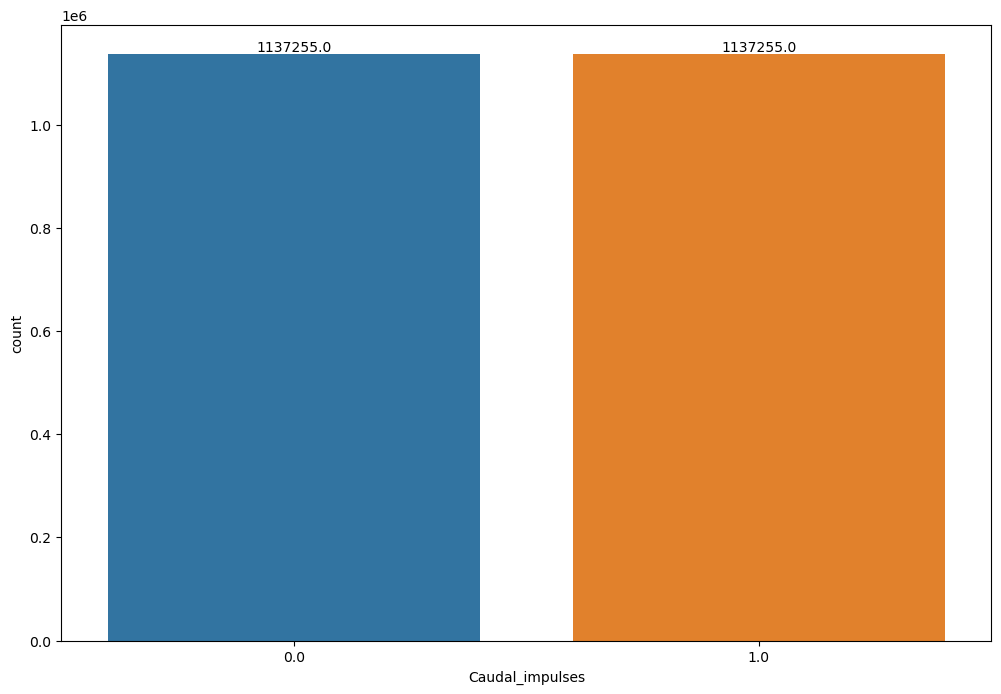

In [34]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x = y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [35]:
X_train.shape

(2274510, 14)

In [36]:
y_train.shape

(2274510,)

In [37]:
X_test.shape

(303390, 14)

In [38]:
y_test.shape

(303390,)

# Performance Metrics Function

In [39]:
labels=['Fault ', 'No Fault']

In [40]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [41]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# DecisionTreeClassifier

Model loaded successfully.
DecisionTreeClassifier Accuracy    : 95.97349945614555
DecisionTreeClassifier Precision   : 83.85428250725361
DecisionTreeClassifier Recall      : 82.66151365550334
DecisionTreeClassifier FSCORE      : 83.24508672954607

 DecisionTreeClassifier classification report
               precision    recall  f1-score   support

      Fault        0.67      0.70      0.69     19103
    No Fault       0.98      0.98      0.98    284287

    accuracy                           0.96    303390
   macro avg       0.83      0.84      0.83    303390
weighted avg       0.96      0.96      0.96    303390



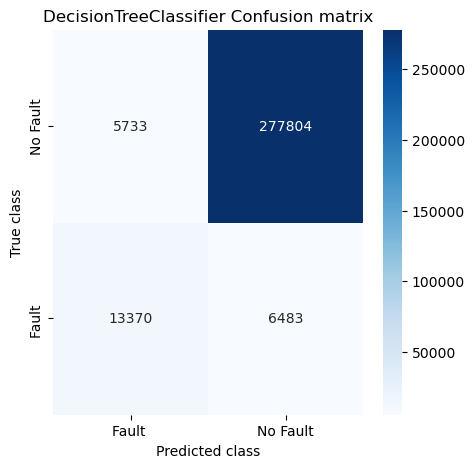

In [42]:
if os.path.exists('model/DecisionTreeClassifier.pkl'):
    # Load the trained model from the file
    DTC = joblib.load('model/DecisionTreeClassifier.pkl')
    print("Model loaded successfully.")
    predict = DTC.predict(X_test)
    calculateMetrics("DecisionTreeClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    DTC = DecisionTreeClassifier()
    DTC.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(DTC,'model/DecisionTreeClassifier.pkl')
    print("Model saved successfully.")
    predict = DTC.predict(X_test)
    calculateMetrics("DecisionTreeClassifier", predict, y_test)

In [43]:
test = pd.read_csv('test.csv')

In [44]:
test

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level
0,-0.014,9.054,9.042,-0.024,9.054,60.450,0.0425,1,0,1,1,0,1,1
1,9.734,9.326,-0.012,-0.018,9.322,63.425,6.0150,0,1,0,0,0,1,1
2,-0.014,9.618,9.606,-0.028,9.616,63.175,3.8450,1,0,1,1,0,1,1
3,-0.010,9.780,9.772,-0.022,9.776,70.150,3.8250,1,0,1,1,0,1,1
4,-0.010,9.516,9.504,-0.018,9.518,68.525,3.7575,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.012,8.598,8.586,-0.014,8.596,60.725,0.0400,1,0,1,1,0,1,1
96,-0.010,9.466,9.454,-0.018,9.466,69.225,3.7000,1,0,1,1,0,1,1
97,-0.010,9.276,9.262,-0.020,9.276,67.250,3.6850,1,0,1,1,0,1,0
98,-0.014,8.450,8.438,-0.022,8.450,60.650,0.0425,1,0,1,1,0,1,1


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
TP2                100 non-null float64
TP3                100 non-null float64
H1                 100 non-null float64
DV_pressure        100 non-null float64
Reservoirs         100 non-null float64
Oil_temperature    100 non-null float64
Motor_current      100 non-null float64
COMP               100 non-null int64
DV_eletric         100 non-null int64
Towers             100 non-null int64
MPG                100 non-null int64
LPS                100 non-null int64
Pressure_switch    100 non-null int64
Oil_level          100 non-null int64
dtypes: float64(7), int64(7)
memory usage: 11.1 KB


In [46]:
test.shape

(100, 14)

In [47]:
# Make predictions
predict = DTC.predict(test)

# Loop through each prediction and print the corresponding row for the first 10 rows
for i, p in enumerate(predict[:20]):  # Slice to limit to first 10 rows
    if p == 0:
        print(test.iloc[i])
        print("Row {}:************************************* Fault".format(i))
    else:
        print(test.iloc[i])
        print("Row {}:************************************** No Fault".format(i))


TP2                -0.0140
TP3                 9.0540
H1                  9.0420
DV_pressure        -0.0240
Reservoirs          9.0540
Oil_temperature    60.4500
Motor_current       0.0425
COMP                1.0000
DV_eletric          0.0000
Towers              1.0000
MPG                 1.0000
LPS                 0.0000
Pressure_switch     1.0000
Oil_level           1.0000
Name: 0, dtype: float64
Row 0:************************************** No Fault
TP2                 9.734
TP3                 9.326
H1                 -0.012
DV_pressure        -0.018
Reservoirs          9.322
Oil_temperature    63.425
Motor_current       6.015
COMP                0.000
DV_eletric          1.000
Towers              0.000
MPG                 0.000
LPS                 0.000
Pressure_switch     1.000
Oil_level           1.000
Name: 1, dtype: float64
Row 1:************************************** No Fault
TP2                -0.014
TP3                 9.618
H1                  9.606
DV_pressure        -0.02

In [48]:
test['predict'] = predict
test

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,predict
0,-0.014,9.054,9.042,-0.024,9.054,60.450,0.0425,1,0,1,1,0,1,1,1.0
1,9.734,9.326,-0.012,-0.018,9.322,63.425,6.0150,0,1,0,0,0,1,1,1.0
2,-0.014,9.618,9.606,-0.028,9.616,63.175,3.8450,1,0,1,1,0,1,1,1.0
3,-0.010,9.780,9.772,-0.022,9.776,70.150,3.8250,1,0,1,1,0,1,1,0.0
4,-0.010,9.516,9.504,-0.018,9.518,68.525,3.7575,1,0,1,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.012,8.598,8.586,-0.014,8.596,60.725,0.0400,1,0,1,1,0,1,1,1.0
96,-0.010,9.466,9.454,-0.018,9.466,69.225,3.7000,1,0,1,1,0,1,1,1.0
97,-0.010,9.276,9.262,-0.020,9.276,67.250,3.6850,1,0,1,1,0,1,0,1.0
98,-0.014,8.450,8.438,-0.022,8.450,60.650,0.0425,1,0,1,1,0,1,1,1.0
